# **Google Play Store EDA & Data Visualization**

**App: Name of the app**

**Category: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc**

**Rating: The current average rating (out of 5) of the app on Google Play**

**Reviews: Number of user reviews given on the app**

**Size: Size of the app in MB (megabytes)**

**Installs: Number of times the app was downloaded from Google Play**

**Type: Whether the app is paid or free**

**Price: Price of the app in US$**

**Last Updated: Date on which the app was last updated on Google Play**

# **Loading The Dataset & Understanding The Dataset**

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [119]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [120]:
df.shape

(10841, 13)

**There is 10841 rows and 13 columns**

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**There is all object columns except Rating column**

In [122]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**The data contains missing values**

In [123]:

df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [124]:
df.duplicated().sum()

483

In [125]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [126]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [127]:
df.columns = df.columns.str.replace(" ","_")

In [128]:

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

# **Data Handling**

**Handling the Reviews column**

In [129]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [130]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [131]:
df['Reviews'].str.isnumeric().sum()

10840

In [132]:
df[~df['Reviews'].str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content_Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last_Updated Current_Ver Android_Ver  
10472       1.0.19  4.0 and up         NaN

In [133]:
df1=df.copy()

In [134]:
df1=df.drop(df1.index[10472])

In [135]:

df1[~df1['Reviews'].str.isnumeric()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content_Rating, Genres, Last_Updated, Current_Ver, Android_Ver]
Index: []

In [136]:
df1['Reviews']=df1['Reviews'].astype(int)

In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


**Handling the Size column**

In [138]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [139]:
df1['Size']=df1['Size'].str.replace('M','000')
df1['Size']=df1['Size'].str.replace('k','')
df1['Size']=df1['Size'].replace('Varies with device',np.nan)
df1['Size']=df1['Size'].astype(float)

In [140]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

In [141]:
df1['Size'].mean()

19579.4199125205

In [142]:
Size_mean = df1["Size"].mean()
print(Size_mean)
df1["Size"].fillna(Size_mean, inplace=True)

19579.4199125205


In [143]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


**Handling the Installs , Price & Last_Updated columns**

In [145]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [146]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [147]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df1[cols]=df1[cols].str.replace(item,'')

In [148]:
df1['Installs']=df1['Installs'].astype('int')
df1['Price']=df1['Price'].astype('float')

In [149]:
df1['Last_Updated']=pd.to_datetime(df1['Last_Updated'])
df1['Day']=df1['Last_Updated'].dt.day
df1['Month']=df1['Last_Updated'].dt.month
df1['Year']=df1['Last_Updated'].dt.year

In [150]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

**Handling the genres column**

In [151]:
df1["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [152]:
len(df1["Genres"].unique())

119

In [153]:
df1["Genres"] = df1["Genres"].str.split(";").str[0]

In [154]:
df1["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [155]:
len(df1["Genres"].unique())

48

In [156]:
df1["Genres"].value_counts()

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
House & 

In [157]:
df1["Genres"].replace("Music & Audio", "Music", inplace =True)

In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

## **EDA & Data Visualization**

In [159]:
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last_Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content_Rating', 'Genres', 'Current_Ver', 'Android_Ver']


In [160]:
df1[df1.duplicated('App')].shape

(1181, 16)

In [161]:
df1=df1.drop_duplicates(subset=['App'],keep='first')

In [162]:
df1[df1.duplicated('App')].shape

(0, 16)

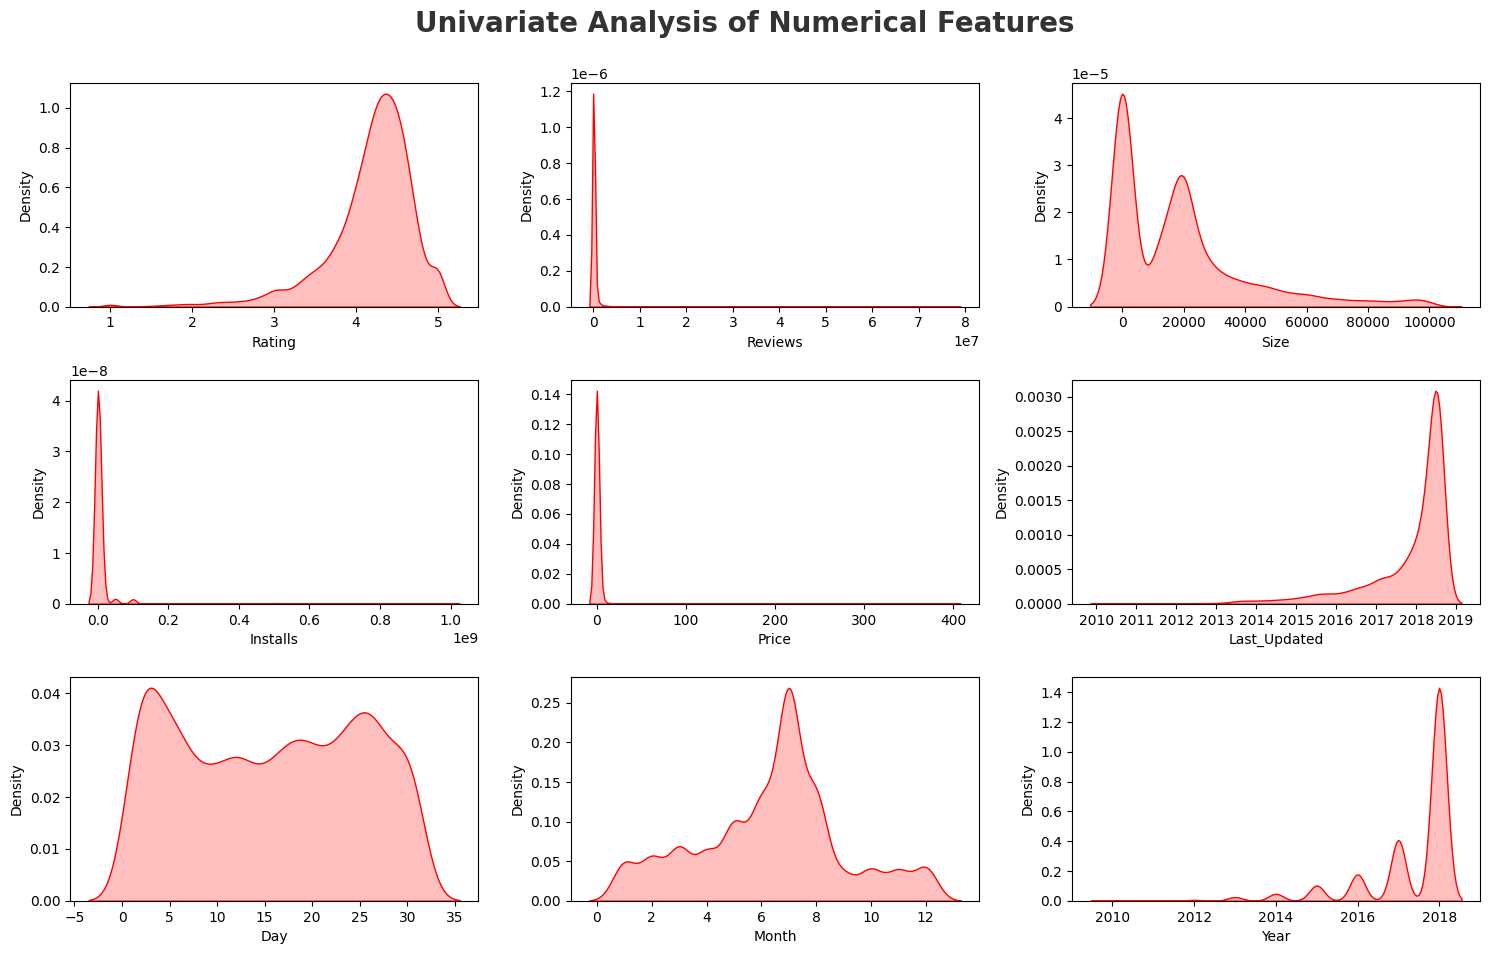

In [163]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df1[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

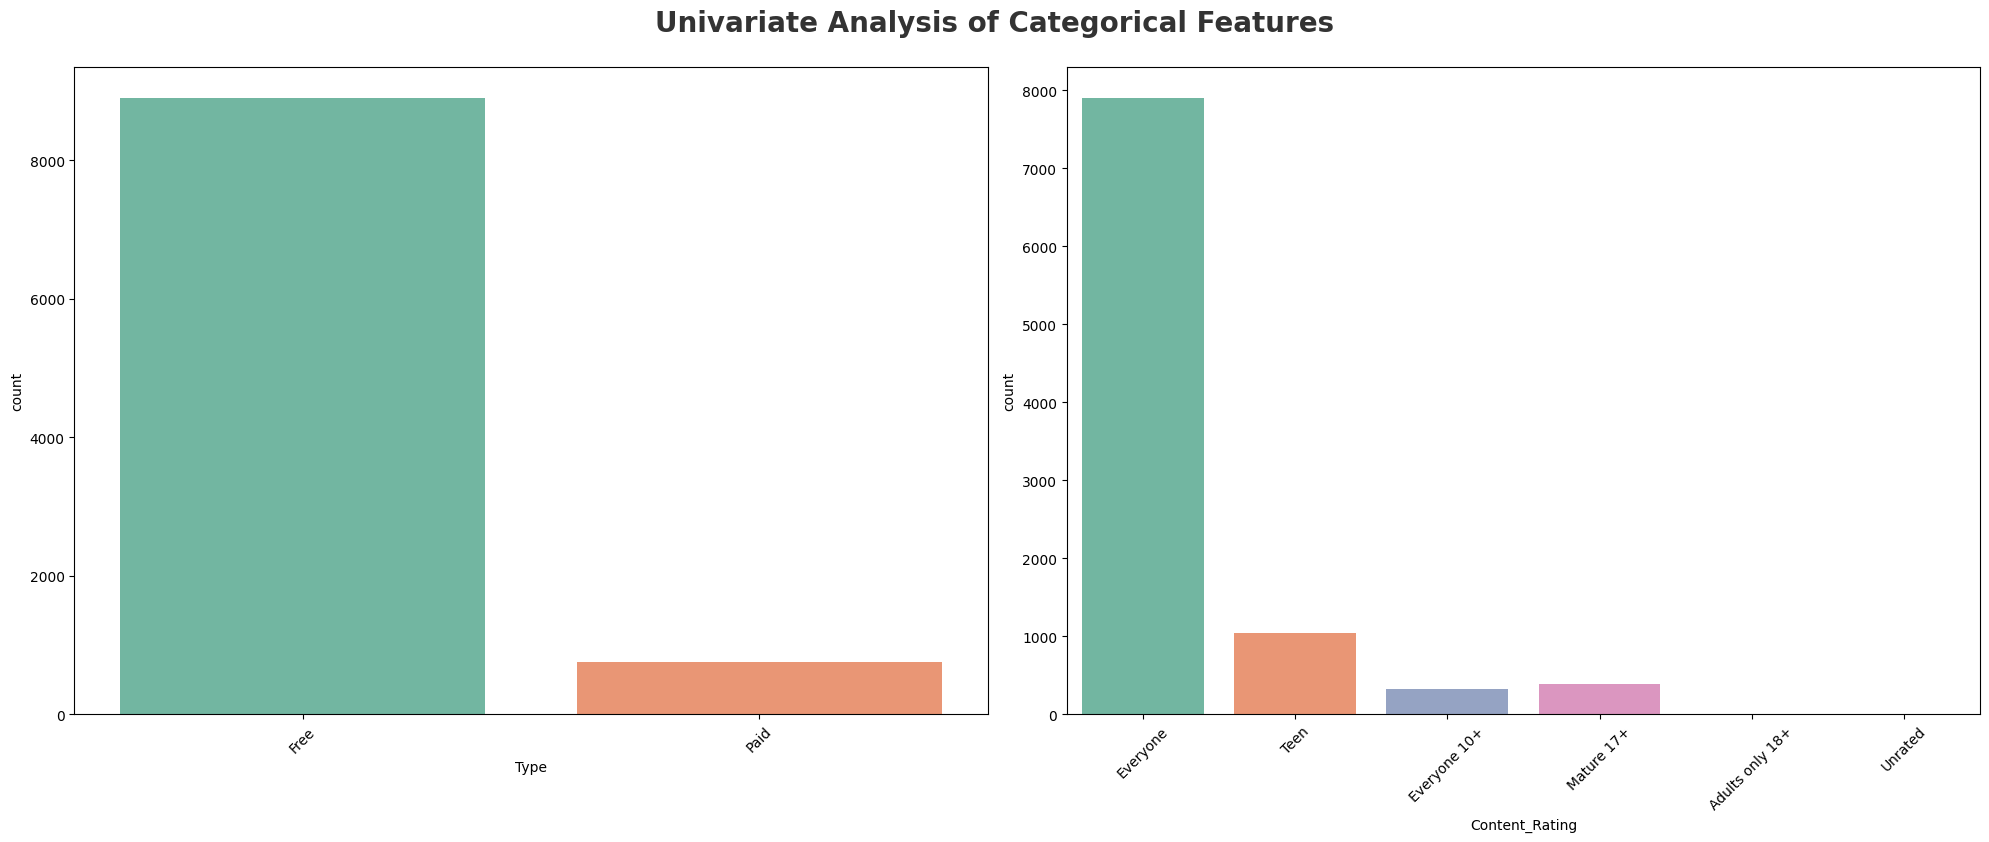

In [164]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content_Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df1[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

**Free apps are more than Paid apps**

**The most apps are in the Everyone category, then comes Teen**

Text(0, 0.5, 'Price')

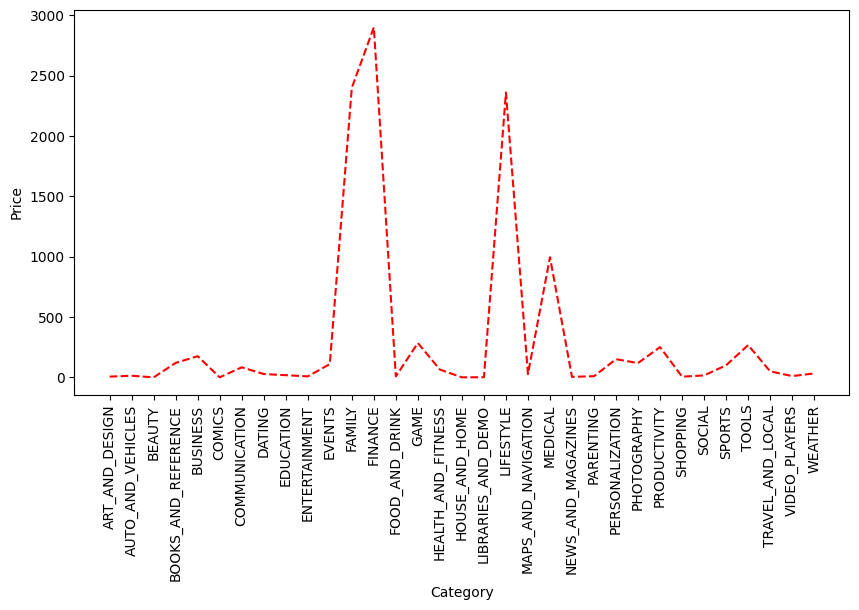

In [165]:
grp = df1.groupby("Category")
y = grp["Price"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='r')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')

**‘Finance’ Category applications has the high prices compared to others
**

Text(0, 0.5, 'Reviews')

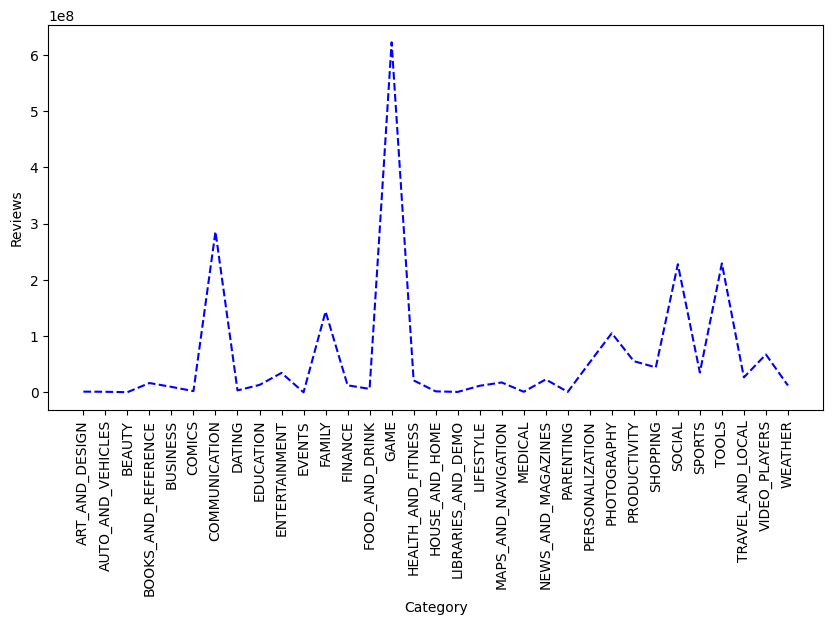

In [166]:
grp = df1.groupby("Category")
y = grp["Reviews"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='b')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Reviews')

**“Game” Category has the highest reviews followed by “Communication” and “Sports"
**

Text(0, 0.5, 'Installs')

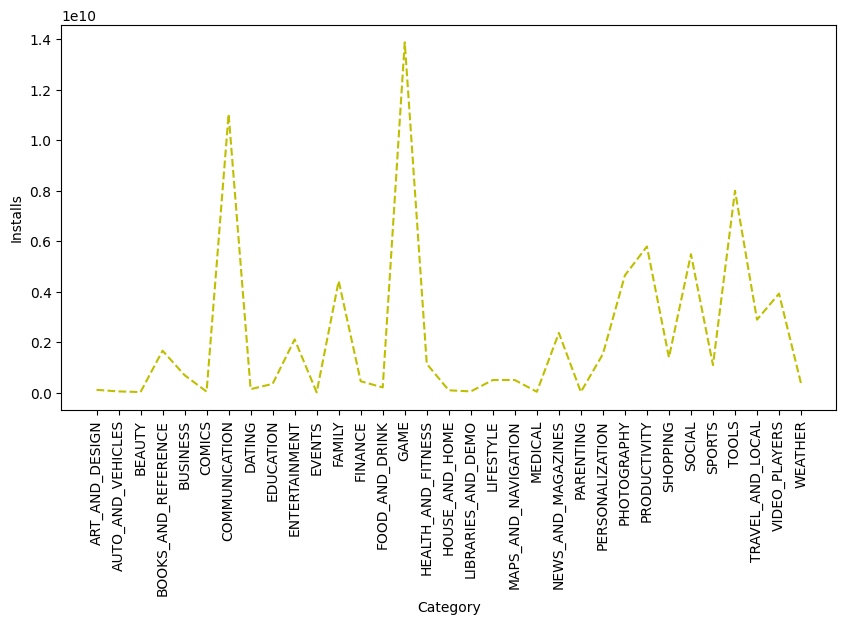

In [167]:
grp = df1.groupby("Category")
y = grp["Installs"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='y')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs')

**Gaming Category applications installed highest number followed by Communication**

Text(0, 0.5, 'Rating')

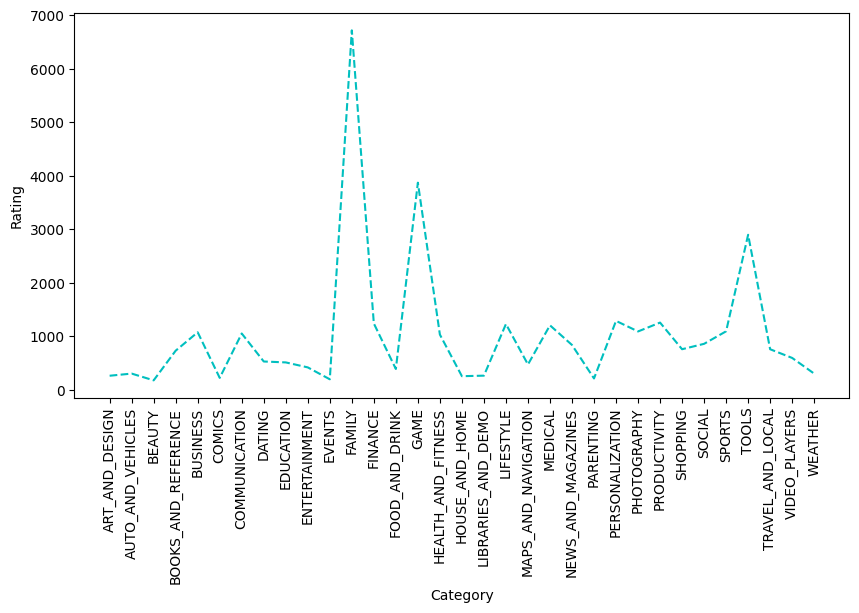

In [168]:
grp = df1.groupby("Category")
y = grp["Rating"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='c')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')

Text(0, 0.5, 'Size')

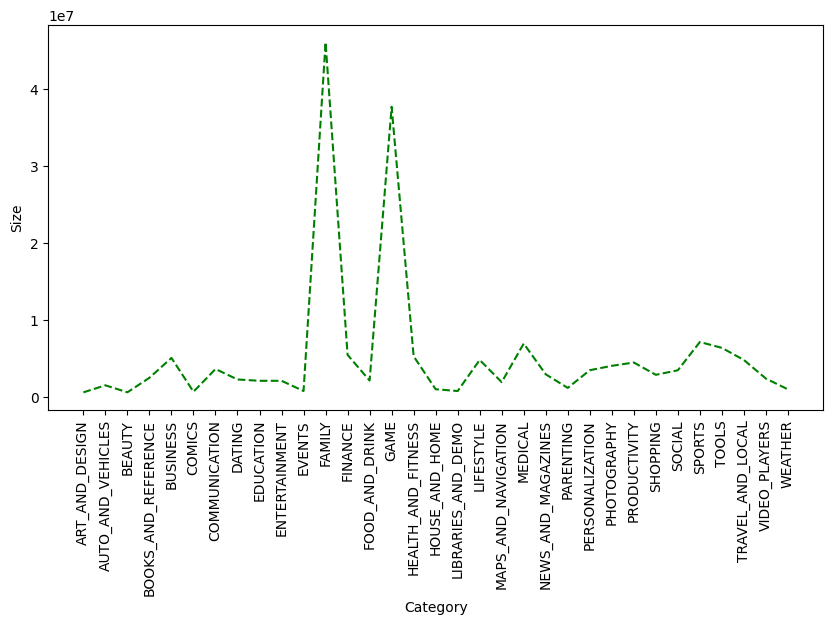

In [169]:
grp = df1.groupby("Category")
y = grp["Size"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='g')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Size')

Text(0, 0.5, 'Size')

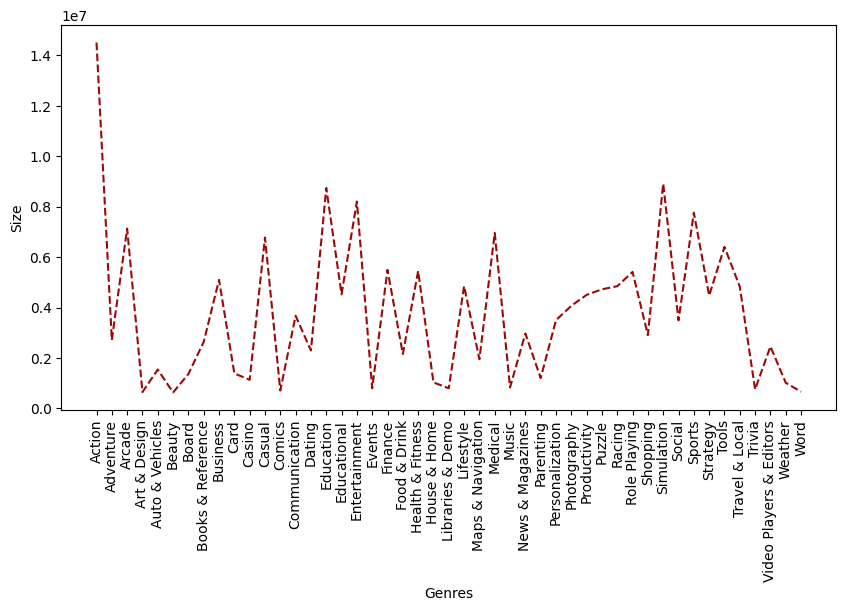

In [170]:
grp = df1.groupby("Genres")
y = grp["Size"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#9C0808')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Size')

Text(0, 0.5, 'Price')

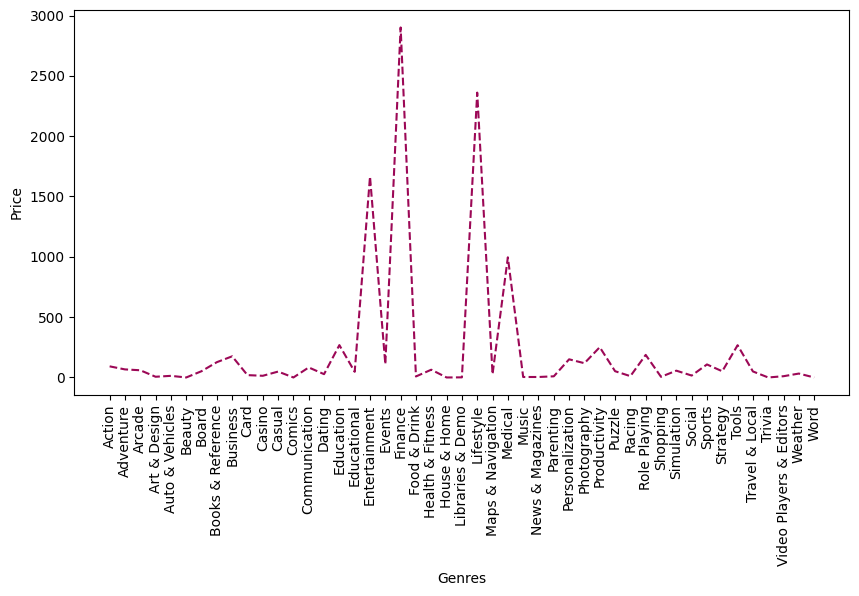

In [171]:
grp = df1.groupby("Genres")
y = grp["Price"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#9C0856')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Price')

Text(0, 0.5, 'Installs')

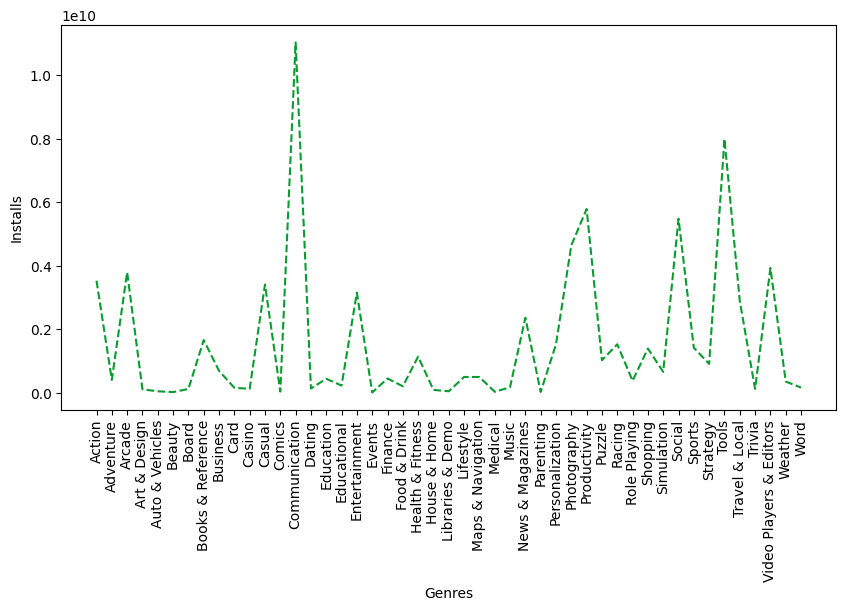

In [172]:
grp = df1.groupby("Genres")
y = grp["Installs"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#089C30')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Installs')

Text(0, 0.5, 'Rating')

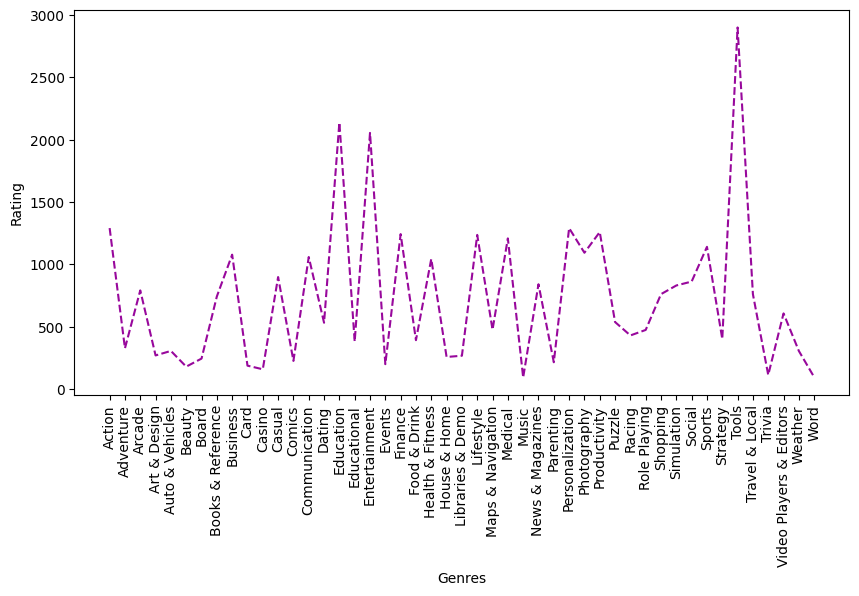

In [173]:
grp = df1.groupby("Genres")
y = grp["Rating"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#98089C')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Rating')

Text(0, 0.5, 'Reviews')

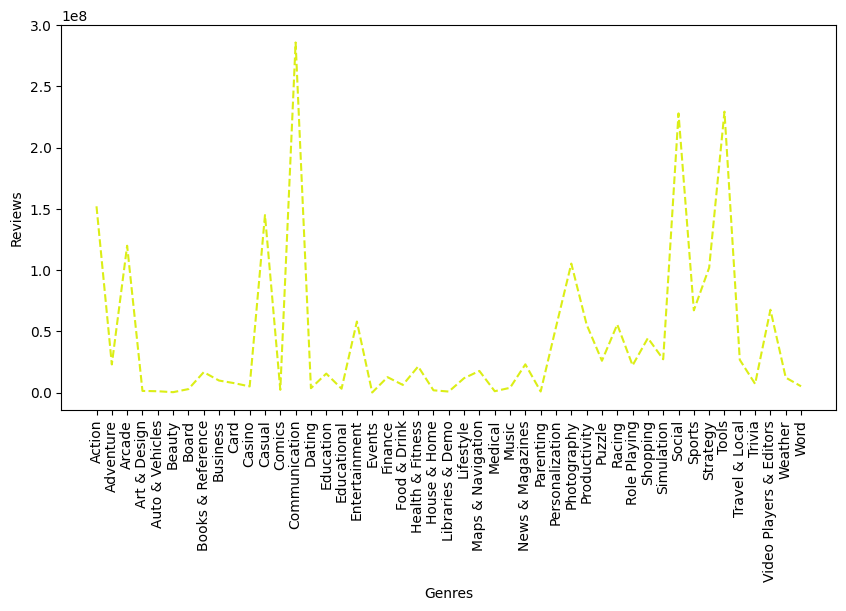

In [174]:
grp = df1.groupby("Genres")
y = grp["Reviews"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#DBEE16')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Reviews')

Text(0, 0.5, 'Size')

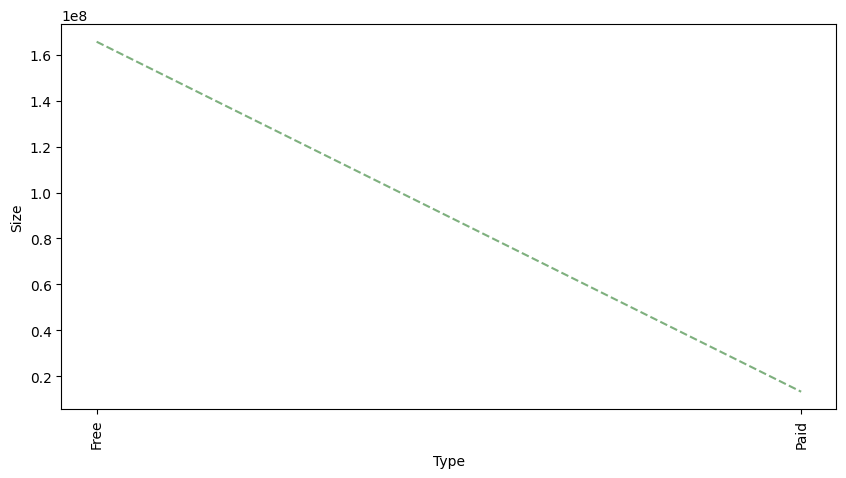

In [175]:
grp = df1.groupby("Type")
y = grp["Size"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#7EB07E')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Size')

Text(0, 0.5, 'Price')

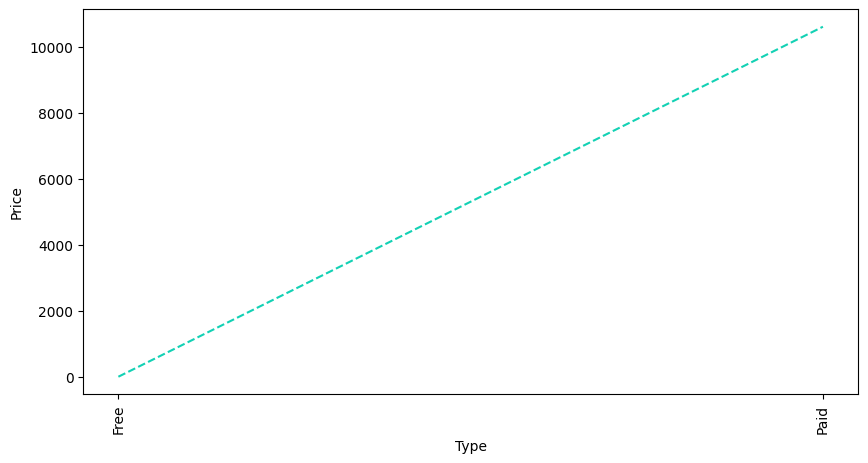

In [176]:
grp = df1.groupby("Type")
y = grp["Price"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#13D1B4')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Price')

Text(0, 0.5, 'Reviews')

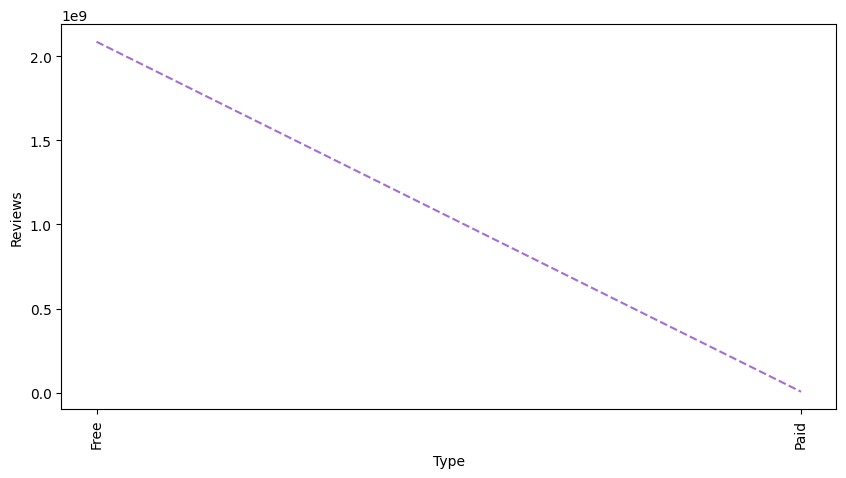

In [177]:
grp = df1.groupby("Type")
y = grp["Reviews"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#A56ED3')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Reviews')

Text(0, 0.5, 'Installs')

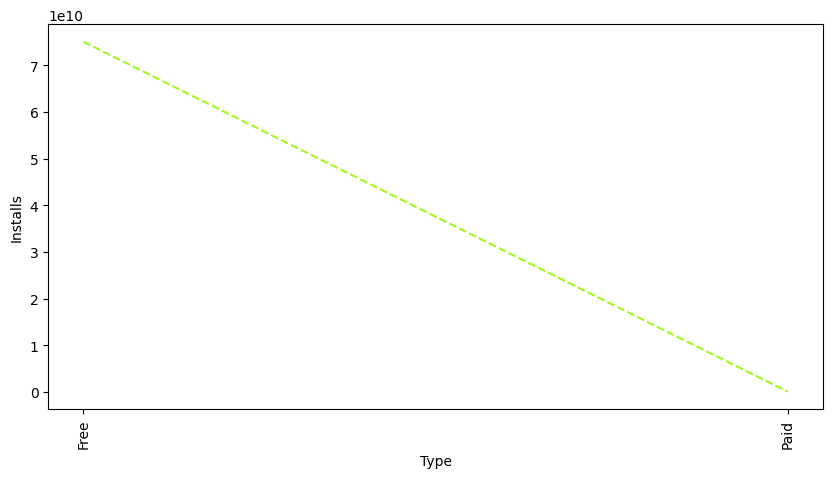

In [178]:
grp = df1.groupby("Type")
y = grp["Installs"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#A4F81B')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Installs')

Text(0, 0.5, 'Rating')

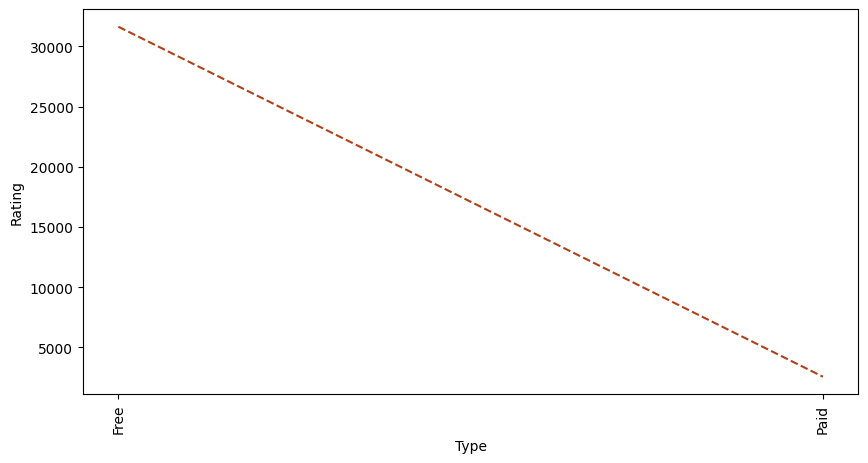

In [179]:
grp = df1.groupby("Type")
y = grp["Rating"].agg(np.sum)
plt.figure(figsize=(10,5))
plt.plot(y,'r--',color='#B0411A')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Rating')

Text(0.5, 1.0, 'Content rating with their counts')

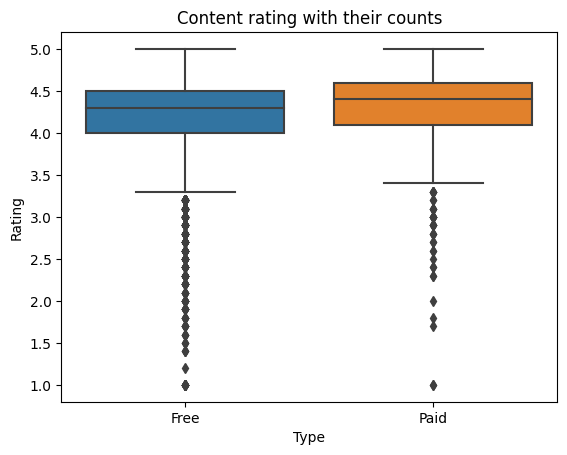

In [180]:
sns.boxplot(x = "Type", y = "Rating", data = df1)
plt.title("Content rating with their counts")

**The average rating of paid apps is higher**

<Axes: ylabel='Category'>

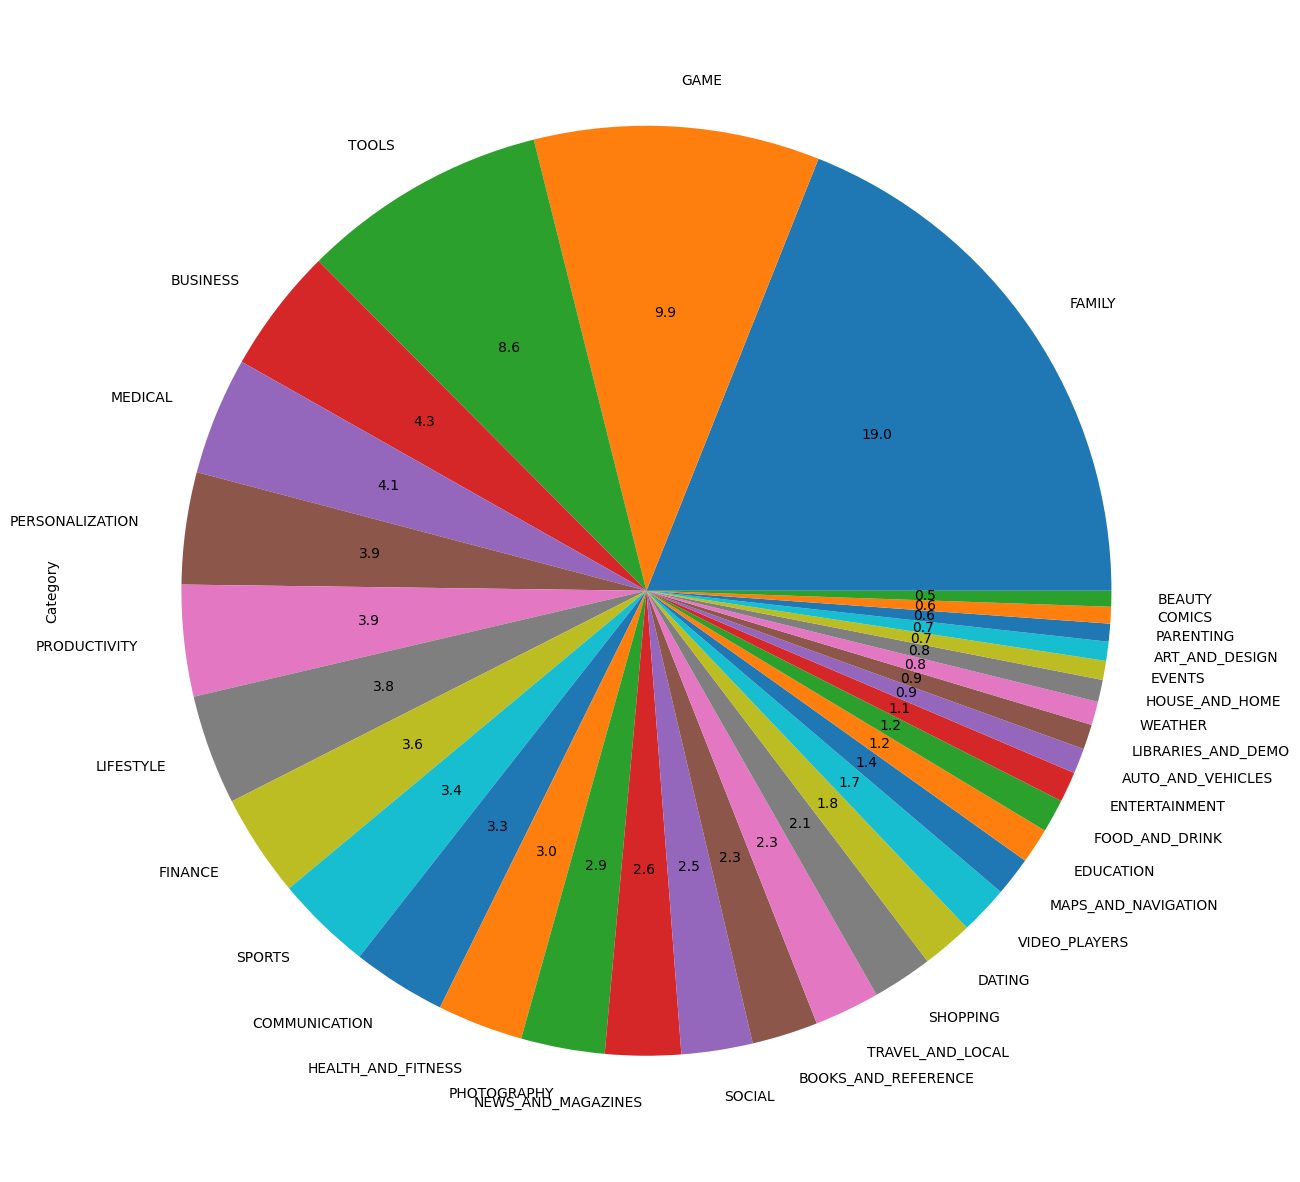

In [181]:
df1['Category'].value_counts().plot.pie(y=df1['Category'],figsize=(15,16),autopct='%1.1f')

<Axes: >

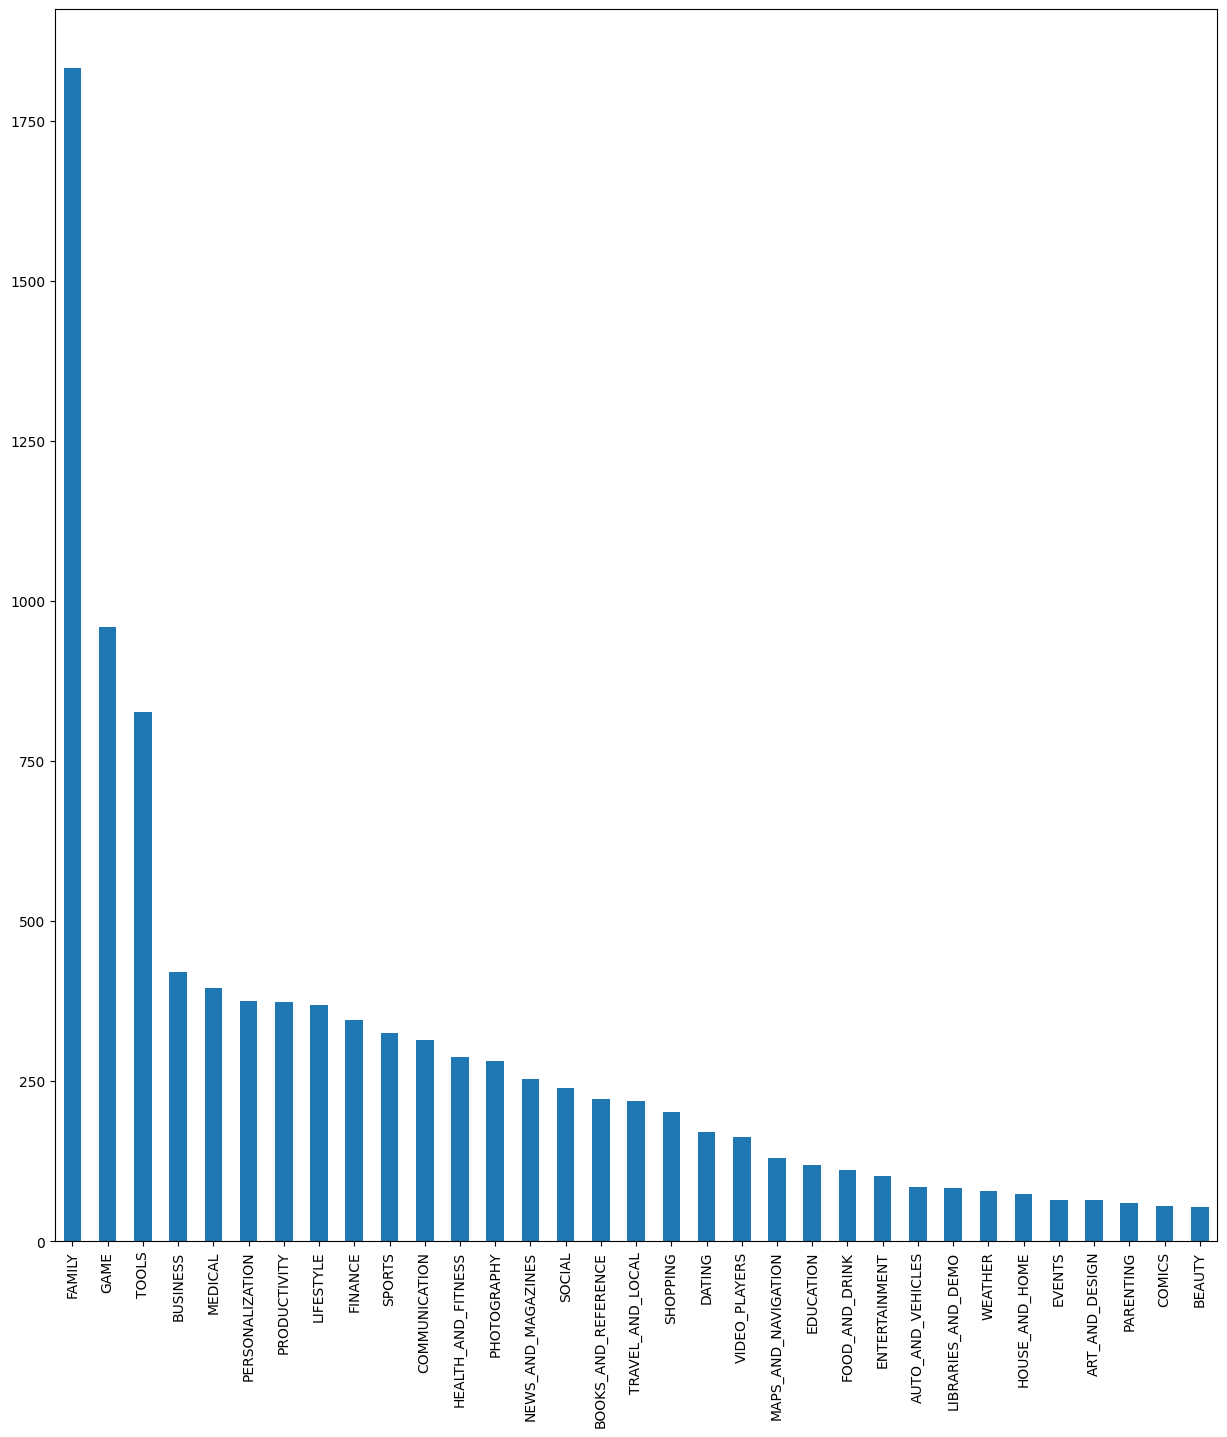

In [182]:
df1['Category'].value_counts().plot.bar(y=df1['Category'],figsize=(15,16))

**The most applications are in the family category, then the game, then tools**

In [183]:

category = pd.DataFrame(df1['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [184]:
category

Count
FAMILY                1832
GAME                   959
TOOLS                  827
BUSINESS               420
MEDICAL                395
PERSONALIZATION        376
PRODUCTIVITY           374
LIFESTYLE              369
FINANCE                345
SPORTS                 325
COMMUNICATION          315
HEALTH_AND_FITNESS     288
PHOTOGRAPHY            281
NEWS_AND_MAGAZINES     254
SOCIAL                 239
BOOKS_AND_REFERENCE    222
TRAVEL_AND_LOCAL       219
SHOPPING               202
DATING                 171
VIDEO_PLAYERS          163
MAPS_AND_NAVIGATION    131
EDUCATION              119
FOOD_AND_DRINK         112
ENTERTAINMENT          102
AUTO_AND_VEHICLES       85
LIBRARIES_AND_DEMO      84
WEATHER                 79
HOUSE_AND_HOME          74
EVENTS                  64
ART_AND_DESIGN          64
PARENTING               60
COMICS                  56
BEAUTY                  53

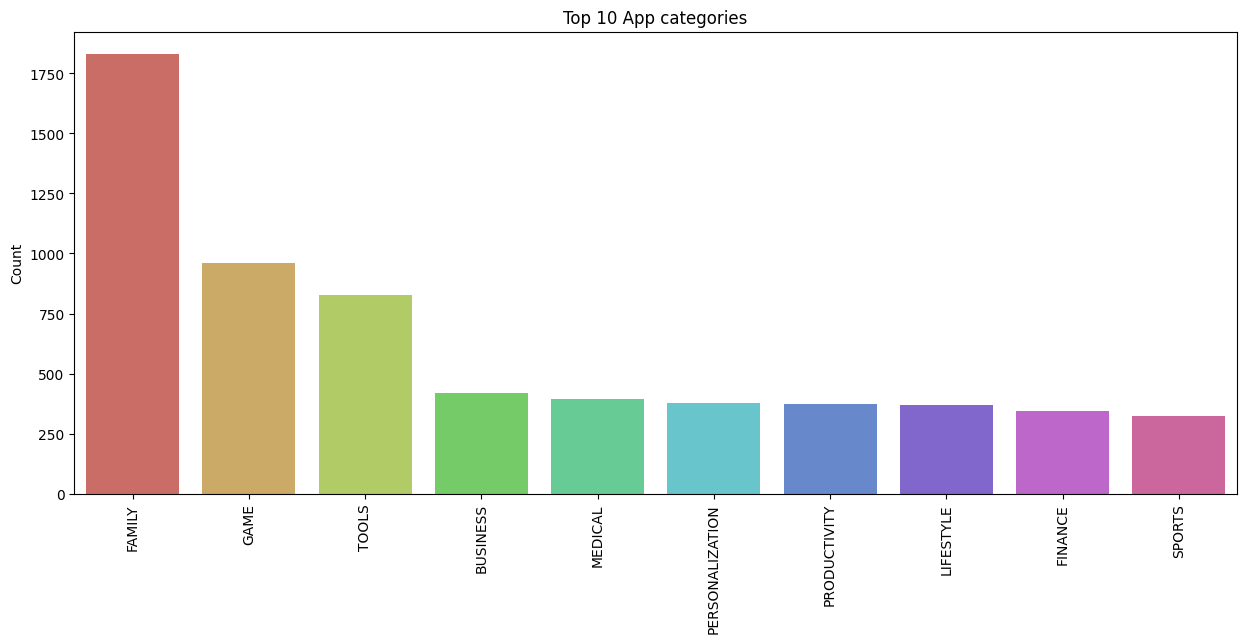

In [185]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'The content rating & rating')

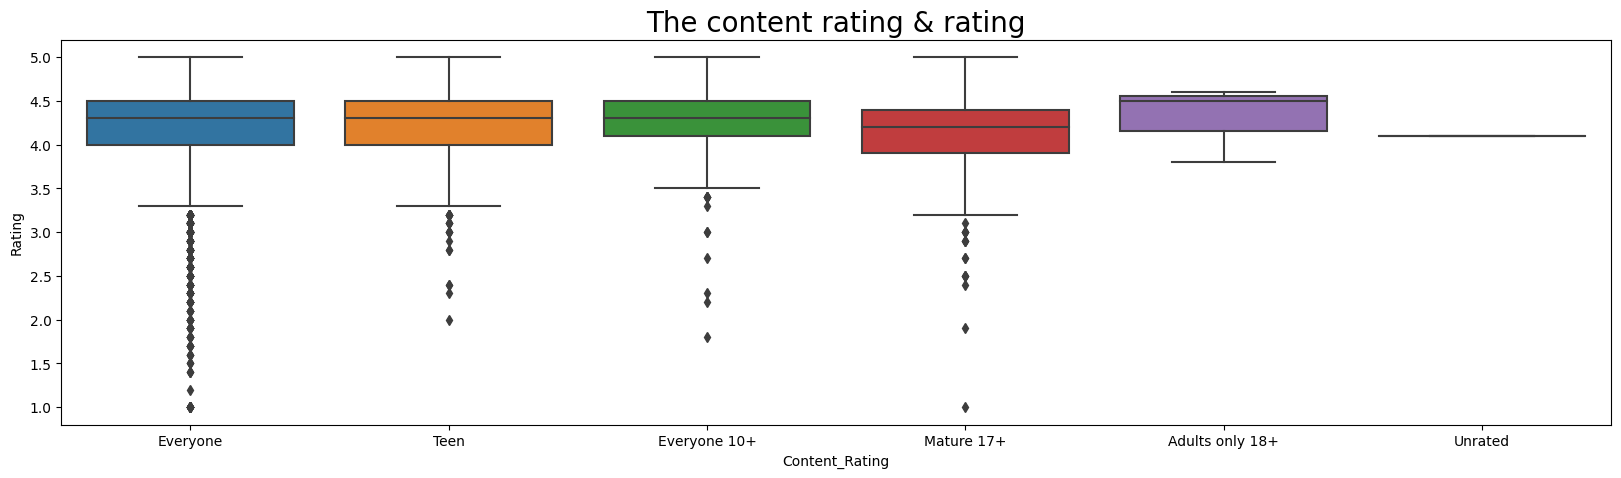

In [186]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = "Content_Rating", y = "Rating", data = df1)
plt.title("The content rating & rating", size=20)

**The ratings are almost the same for Everyone, Teen, Everyone 10+. The Everyone has more outliers than other categories. Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others**

Text(0.5, 1.0, 'Category & Price')

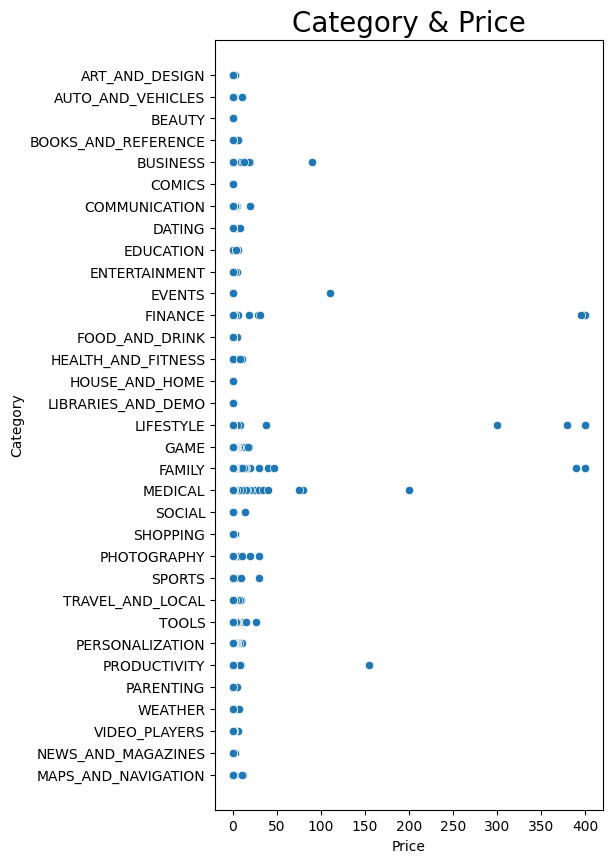

In [187]:
plt.figure(figsize=(5, 10))
sns.scatterplot(data = df1, y = "Category", x = "Price")
plt.title("Category & Price", size=20)

**The highest paid applications are finance, lifestyle, and family**

Text(0.5, 1.0, 'Heatmap for numerical columns')

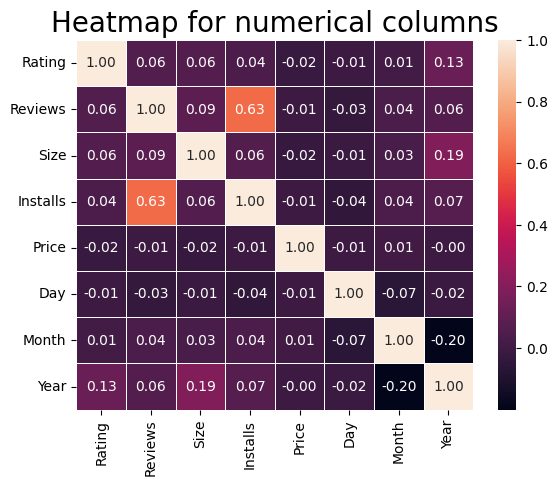

In [188]:
sns.heatmap(df1.corr(), annot = True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=20)

**The relationship between the Installs and Reviews columns is 0.63**

Text(0.5, 1.0, 'Histogram with the kde for the rating column ')

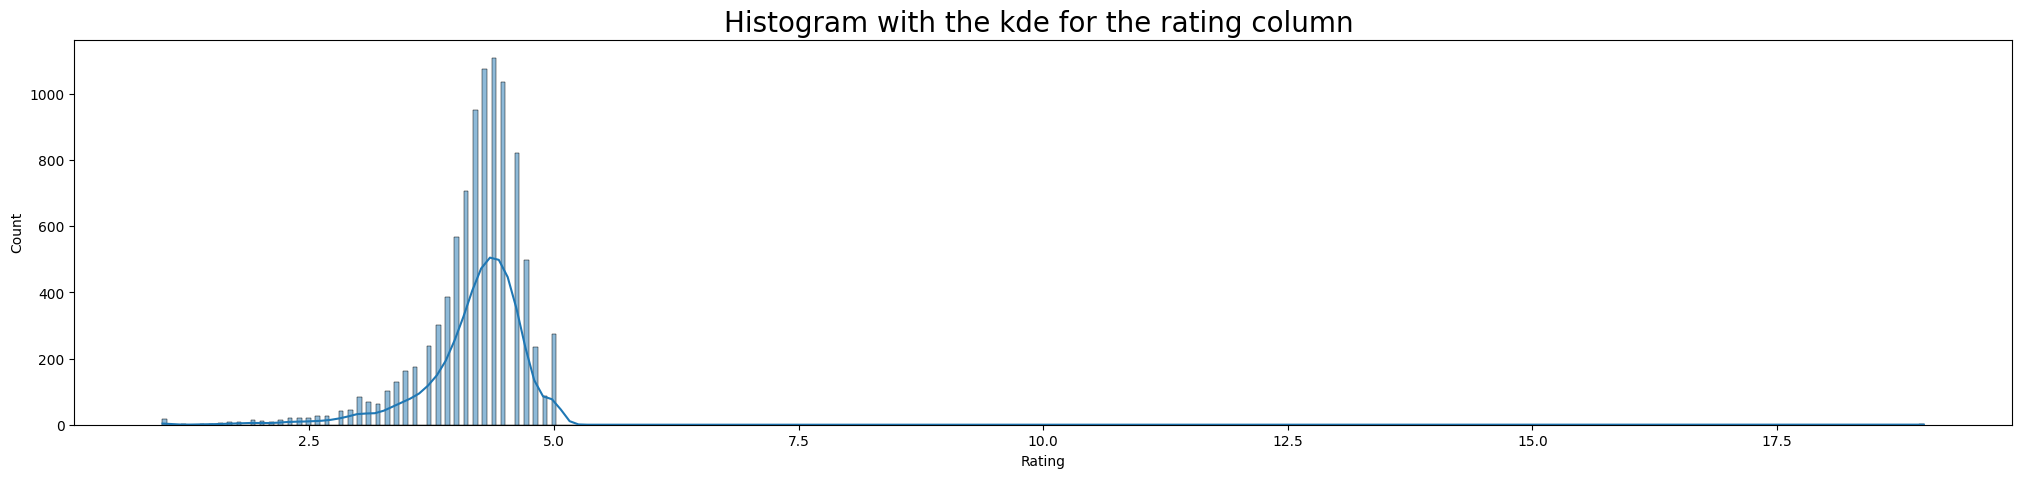

In [189]:

plt.figure(figsize=(25, 5))
sns.histplot(df["Rating"], kde = True)
plt.title("Histogram with the kde for the rating column ", size=20,)

**The most values are distributed around 4.3**

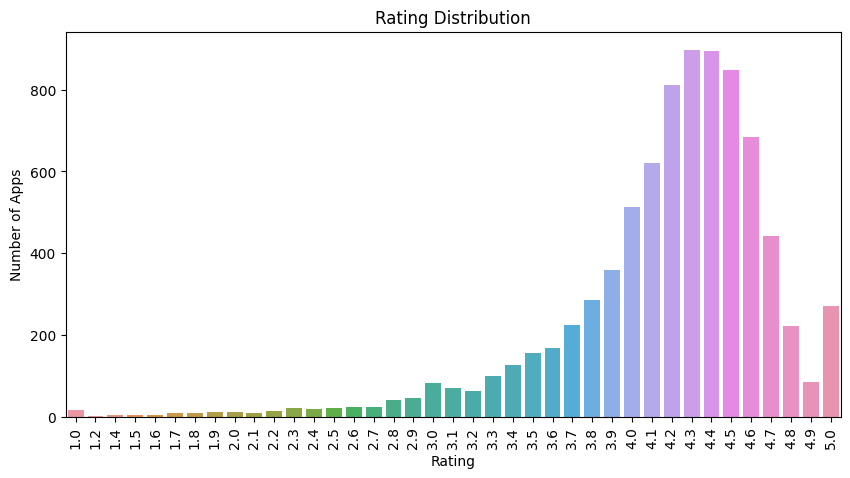

In [190]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df1)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

**most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7**

<Axes: xlabel='Rating', ylabel='Android_Ver'>

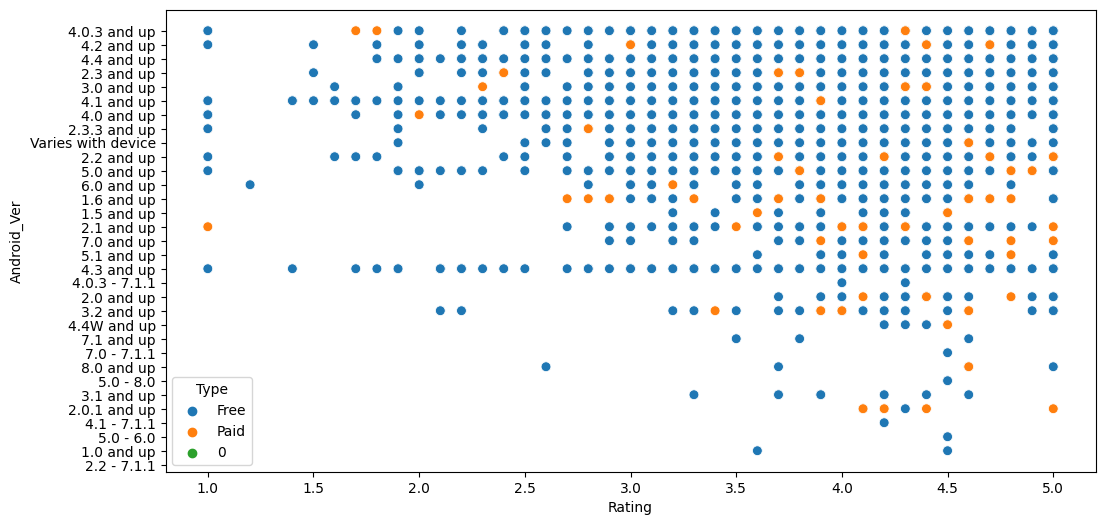

In [191]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df,y ='Android_Ver',x ='Rating',hue='Type',s=50)

([<matplotlib.patches.Wedge at 0x7fa30b32dba0>,
 [Text(-1.0669065823375825, 0.26778787232572626, 'Free'),
  Text(1.1638981103363588, -0.2921321426263347, 'Paid')],
 [Text(-0.5819490449114085, 0.14606611217766885, '92.2%'),
  Text(0.678940564362876, -0.17041041653202854, '7.8%')])

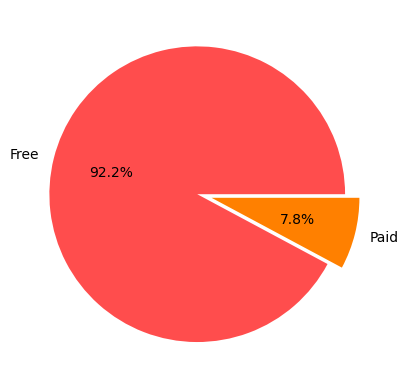

In [192]:
plt.pie(x=df1['Type'].value_counts(),labels=['Free','Paid'],explode=[0,0.1],autopct='%1.1f%%',colors=['#ff4d4d','#ff8000'])

<Axes: xlabel='count', ylabel='Genres'>

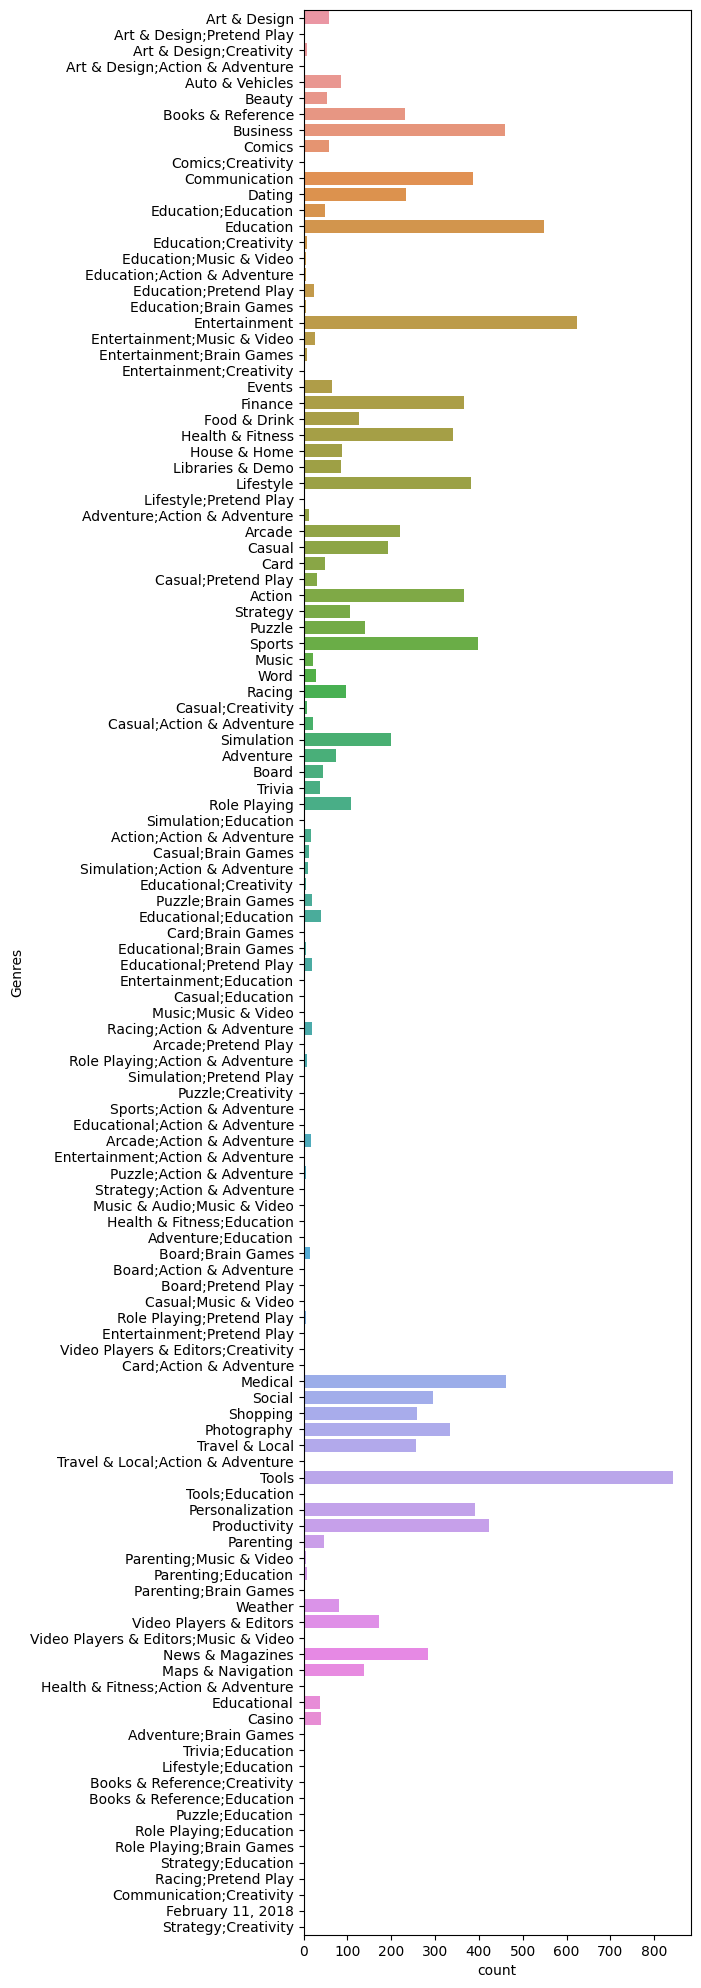

In [193]:
plt.figure(figsize=(5,25))
sns.countplot(data=df1, y=df["Genres"])

**There are more than 500 apps in 3 app genres: Tools, Entertainment, Education**

<Axes: ylabel='Content_Rating'>

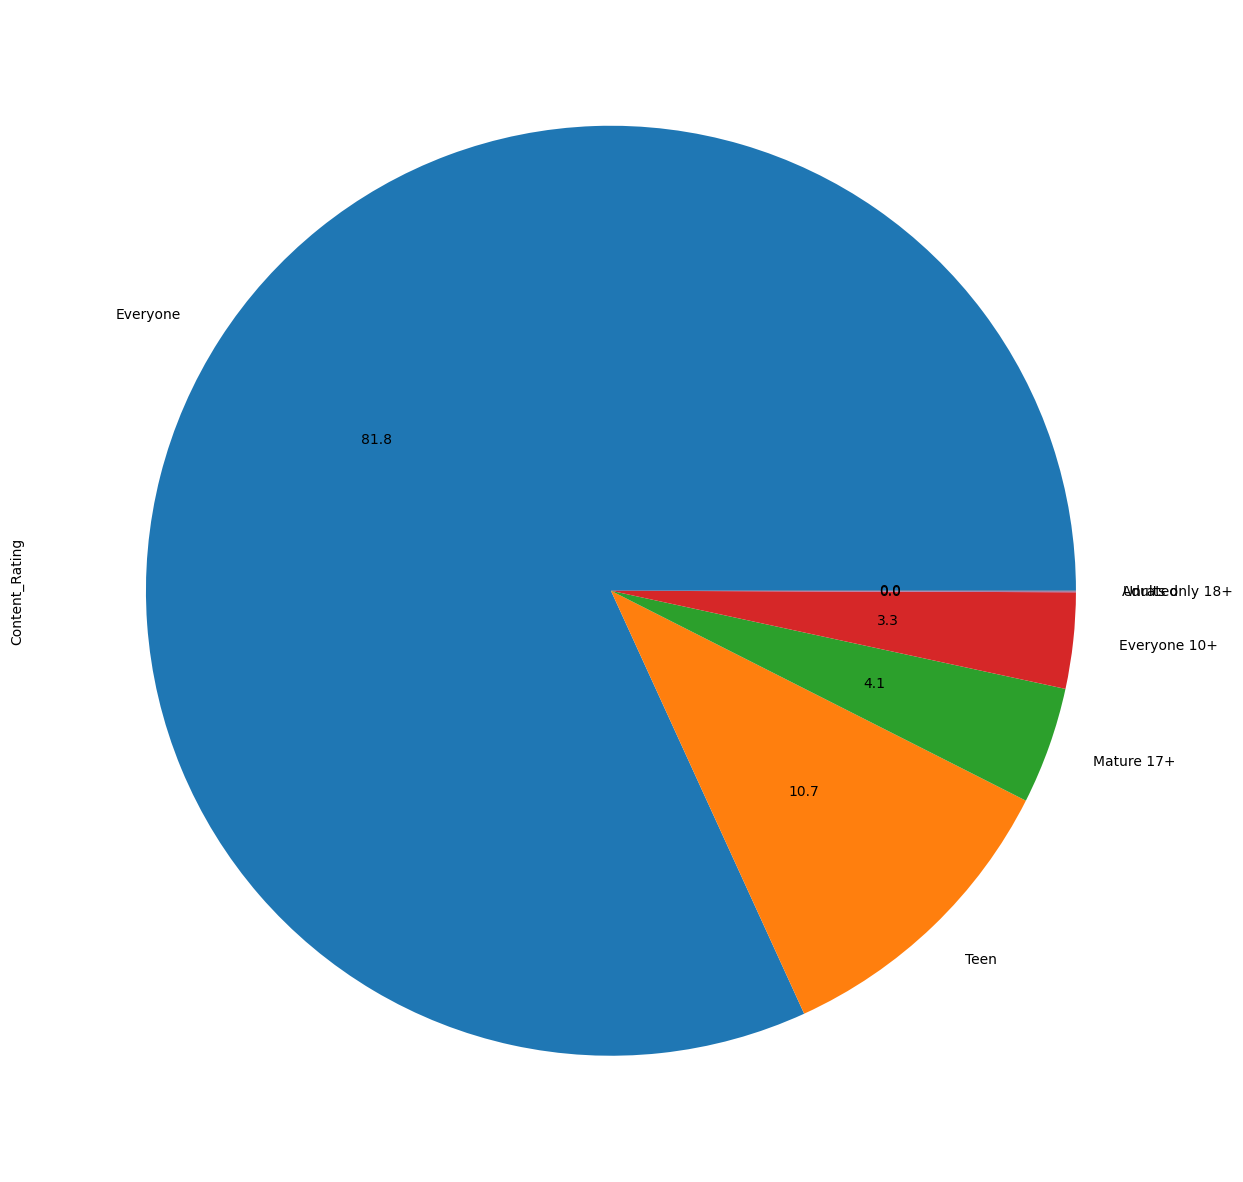

In [194]:
df1['Content_Rating'].value_counts().plot.pie(y=df1['Content_Rating'],figsize=(15,16),autopct='%1.1f')

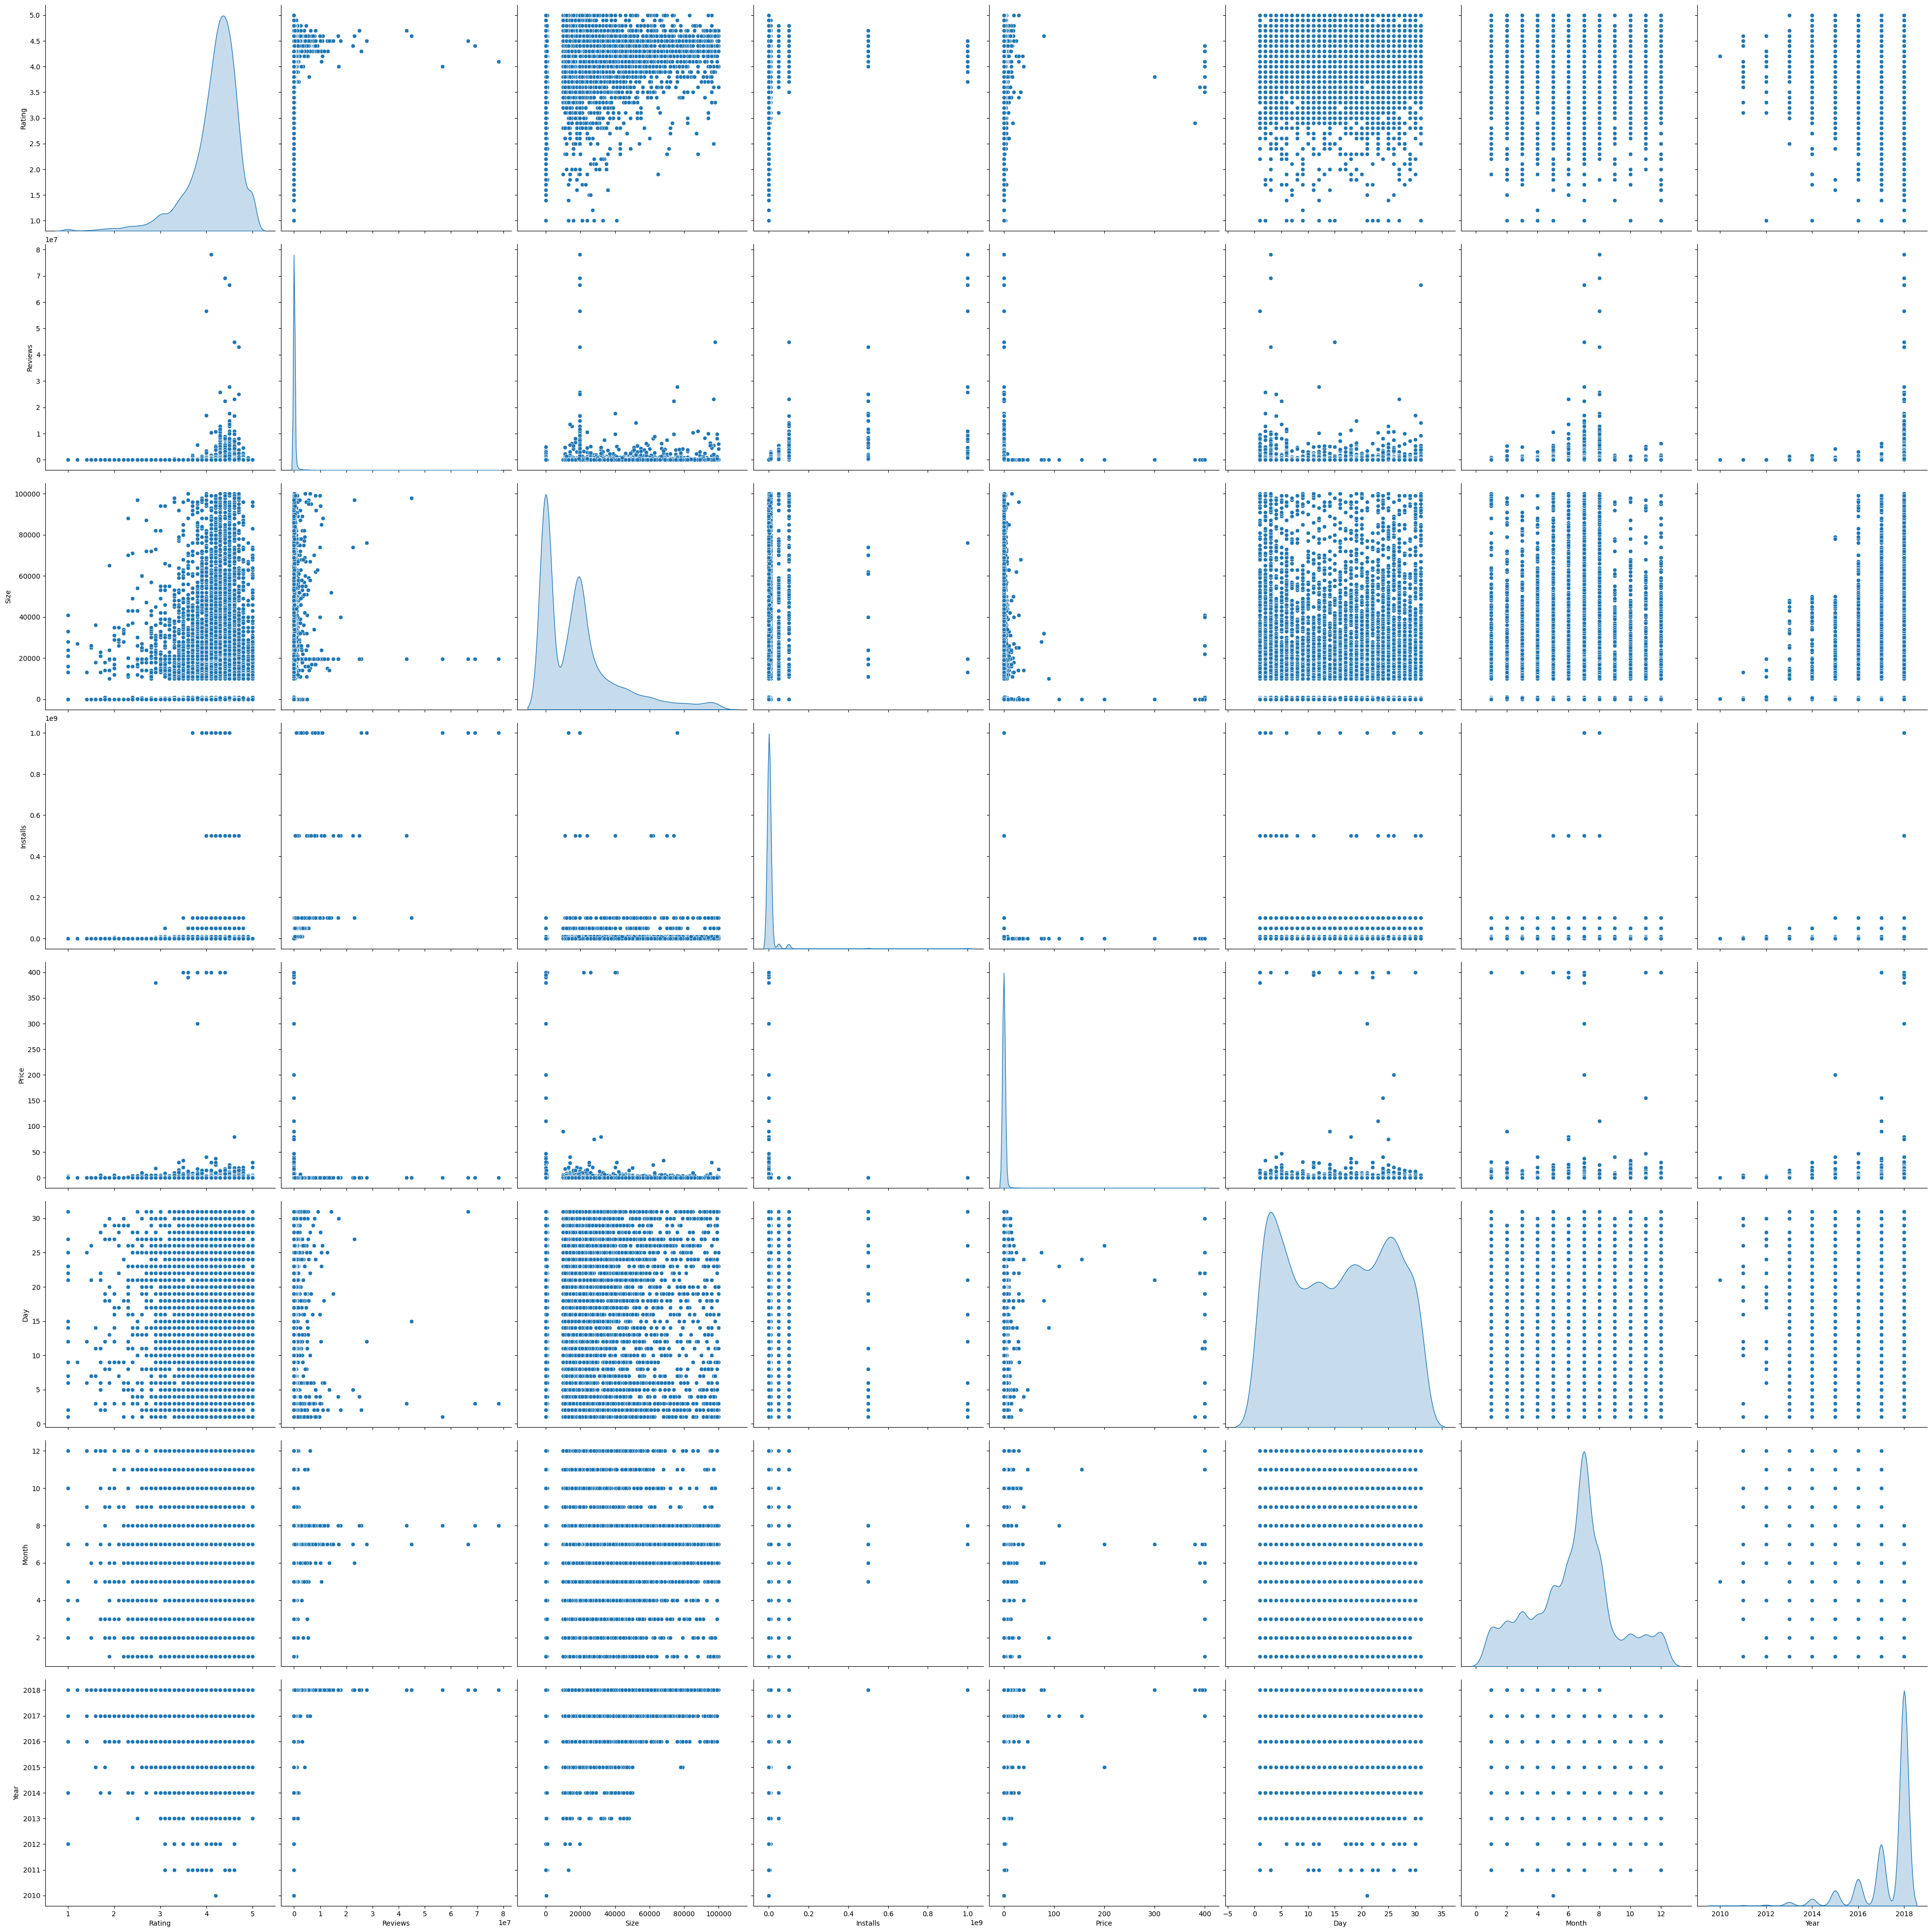

In [195]:
sns.pairplot(df1,kind='scatter', height=5,diag_kind='kde')

([<matplotlib.patches.Wedge at 0x7fa305392dd0>,
 [Text(-1.0936711669182966, 0.7027683677084304, 'Everyone'),
  Text(0.9007449622518178, -0.9373678642763318, 'Teen'),
  Text(1.2253480635221528, -0.4341913440207097, 'Mature 17+'),
  Text(1.2924281380047973, -0.14010534641280786, 'Everyone 10+'),
  Text(1.2999966307398065, -0.0029597407236558867, 'Adults only 18+'),
  Text(1.2999997249742585, -0.0008456162562531007, 'Unrated')],
 [Text(-0.6730284104112595, 0.4324728416667264, '81.8%'),
  Text(0.5543045921549647, -0.5768417626315887, '10.7%'),
  Text(0.7540603467828633, -0.26719467324351365, '4.1%'),
  Text(0.7953403926183368, -0.08621867471557407, '3.3%'),
  Text(0.7999979266091117, -0.001821378906865161, '0.0%'),
  Text(0.7999998307533897, -0.0005203792346172927, '0.0%')])

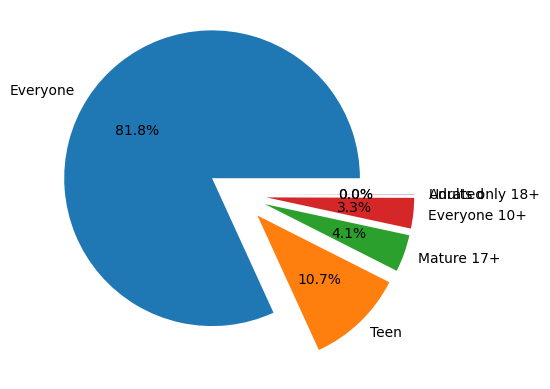

In [196]:
plt.pie(x=df1['Content_Rating'].value_counts(),labels=df1['Content_Rating'].value_counts().index,explode=[0.2,0.2,0.2,0.2,0.2,0.2],autopct='%1.1f%%')

# **REPORT**

**Most apps are in 3 categories FAMILY,GAME,TOOLS**

**There are 92.2% free apps & only 7.8% paid apps on google playstore**

**There are more than 500 apps in 3 app genres: Tools, Entertainment, Education**

**we can infer that 81.7 apps can be used by everyone**

**Maximum app downloads are in free apps**

**More number of installs results the increase in the reviews count as well**